In [1376]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1377]:
import numpy as np
import pandas as pd

In [1378]:
day = pd.read_csv("day.csv")

In [1379]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1380]:
day.shape

(730, 16)

In [1381]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1382]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1383]:
day.yr = day.yr.apply(lambda x: 2018 if x == 0 else 2019)

In [1384]:
def get_season(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    elif x == 4:
        return 'winter'
    else:
        return x

day.season = day.season.apply(lambda x: get_season(x))

In [1385]:
day.holiday = day.holiday.apply(lambda x: 'yes' if x == 1 else 'no')

In [1386]:
day.workingday = day.workingday.apply(lambda x: 'yes' if x == 1 else 'no')

In [1387]:
def get_weathersit(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light'
    elif x == 4:
        return 'Heavy'
    else:
        return x

day.weathersit = day.weathersit.apply(lambda x: get_weathersit(x))

In [1388]:
day['weathersit'].unique()

array(['Mist', 'Clear', 'Light'], dtype=object)

In [1389]:
day['weathersit'].astype('category').value_counts()

Clear    463
Mist     246
Light     21
Name: weathersit, dtype: int64

In [1390]:
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
day[['weekday']] = day[['weekday']].apply(str_map)

In [1391]:
day['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [1392]:
def get_mnth(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sept'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'
    else:
        return x

day.mnth = day.mnth.apply(lambda x: get_mnth(x))

In [1393]:
import matplotlib.pyplot as plt
import seaborn as sns

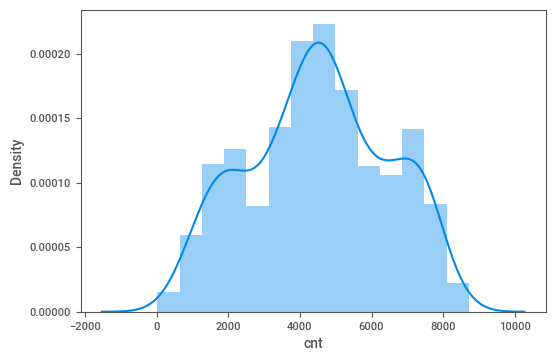

In [1394]:
sns.distplot(day['cnt'])
plt.show()

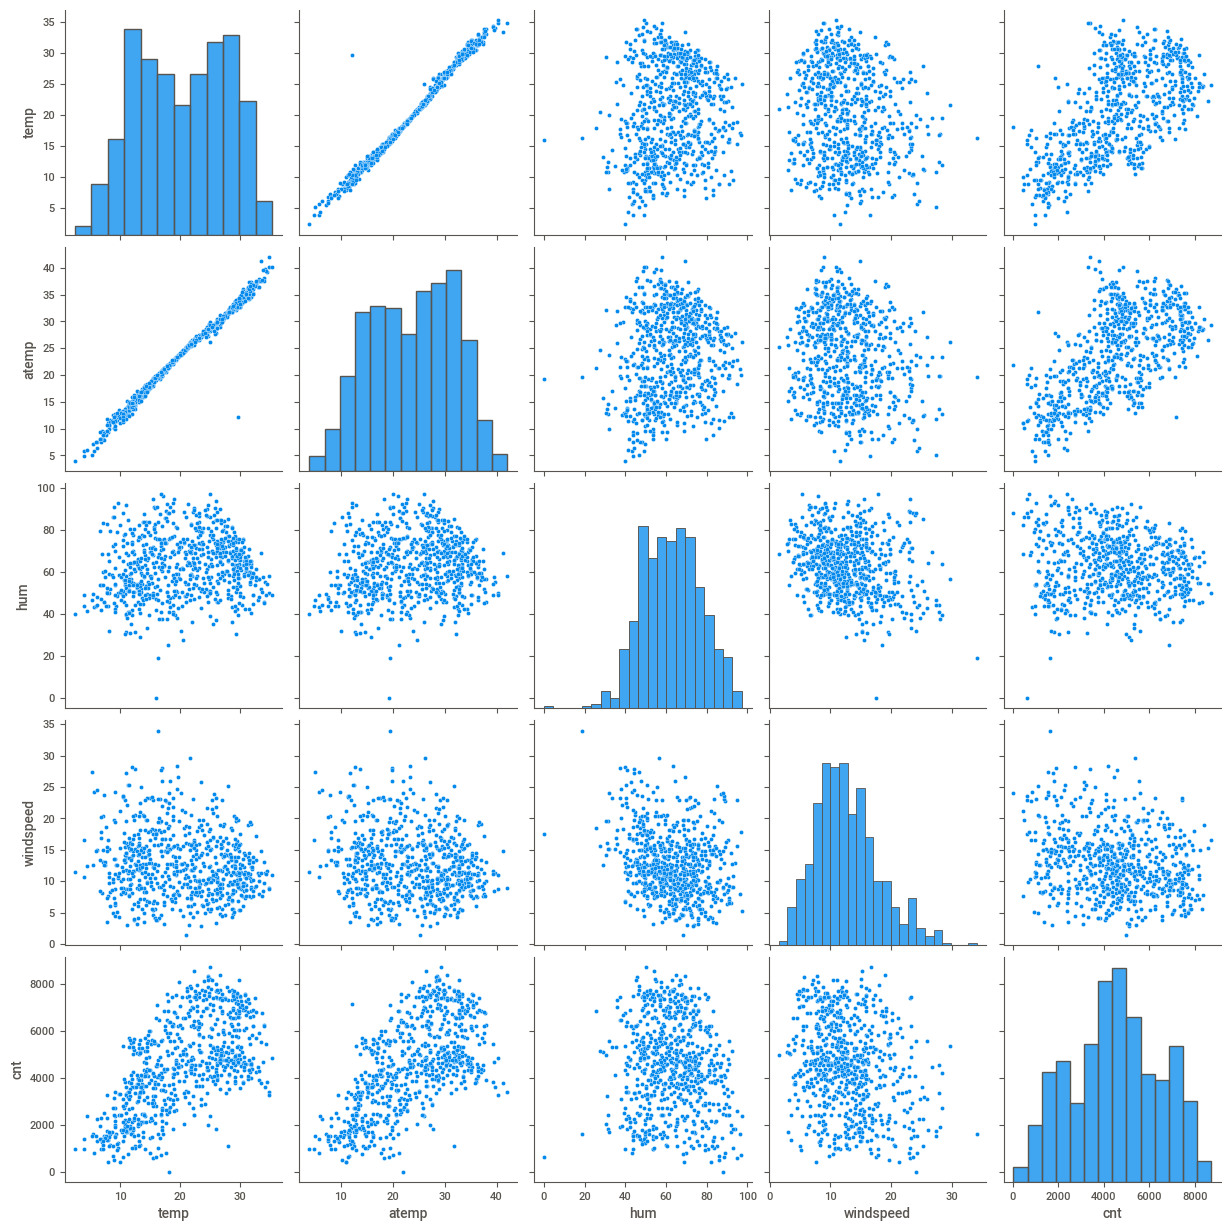

In [1395]:
sns.pairplot(day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

In [1396]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(day)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1397]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,no,Mon,no,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,no,Tues,no,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,no,Wed,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,no,Thurs,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,no,Fri,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


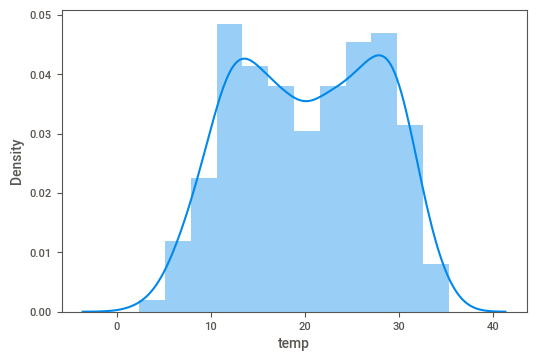

In [1398]:
sns.distplot(day['temp'])
plt.show()

In [1399]:
# As we already have month, year, dropping dteday which is redundant now
day.drop(['dteday'], axis=1, inplace=True)
# Column 'instant' is just representing serial number so in our prediction there is no use of Sr. No., so we can drop 'instant' column as well
day.drop(['instant'], axis=1, inplace=True)

In [1400]:
day[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


In [1401]:
# From above pairplot, we can clearly see that 'temp' and 'atemp' are highly correlated, so we can drop one of them, maybe let's take 'atemp'
day.drop(['atemp'], axis=1, inplace=True)

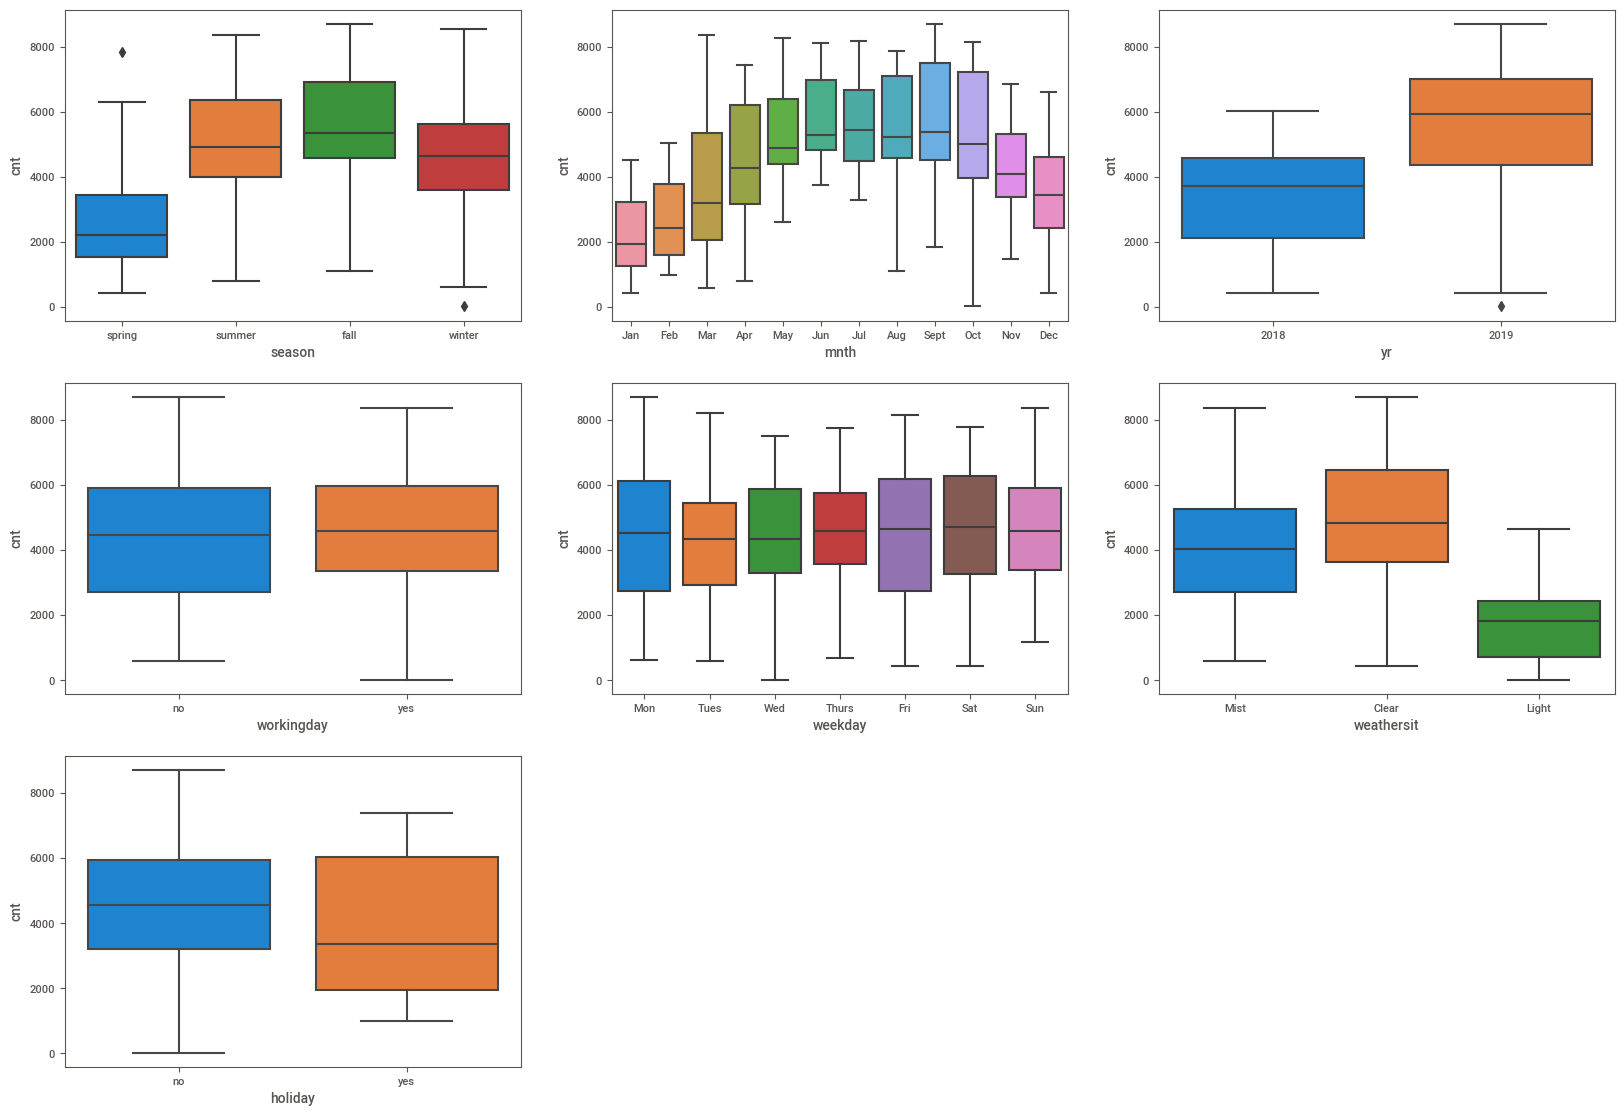

In [1402]:
plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.show()

In [1403]:
day.yr = day.yr.apply(lambda x: 0 if x == 2018 else 1)
day.holiday = day.holiday.apply(lambda x: 1 if x == 'yes' else 0)
day.workingday =day.workingday.apply(lambda x: 1 if x == 'yes' else 0)

In [1404]:
day['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [1405]:
day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [1406]:
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    day[var] = day[var].astype("float")

In [1407]:
# Get dummies
dummies = pd.get_dummies(day[['season', 'weathersit', 'weekday', 'mnth']], drop_first=True)

day = pd.concat([day, dummies], axis = 1)

day.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)

In [1408]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,1,0,0,0,0,0,0,0


In [1409]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size=0.7, test_size=0.3, random_state=100)

In [1410]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light', 'weathersit_Mist', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept'],
      dtype='object')

In [1411]:
from sklearn.preprocessing import MinMaxScaler

In [1412]:
scaler = MinMaxScaler()

In [1413]:
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [1414]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,1,0,0,0,0,0,0,0,0,0


In [1415]:
df_train.cnt

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

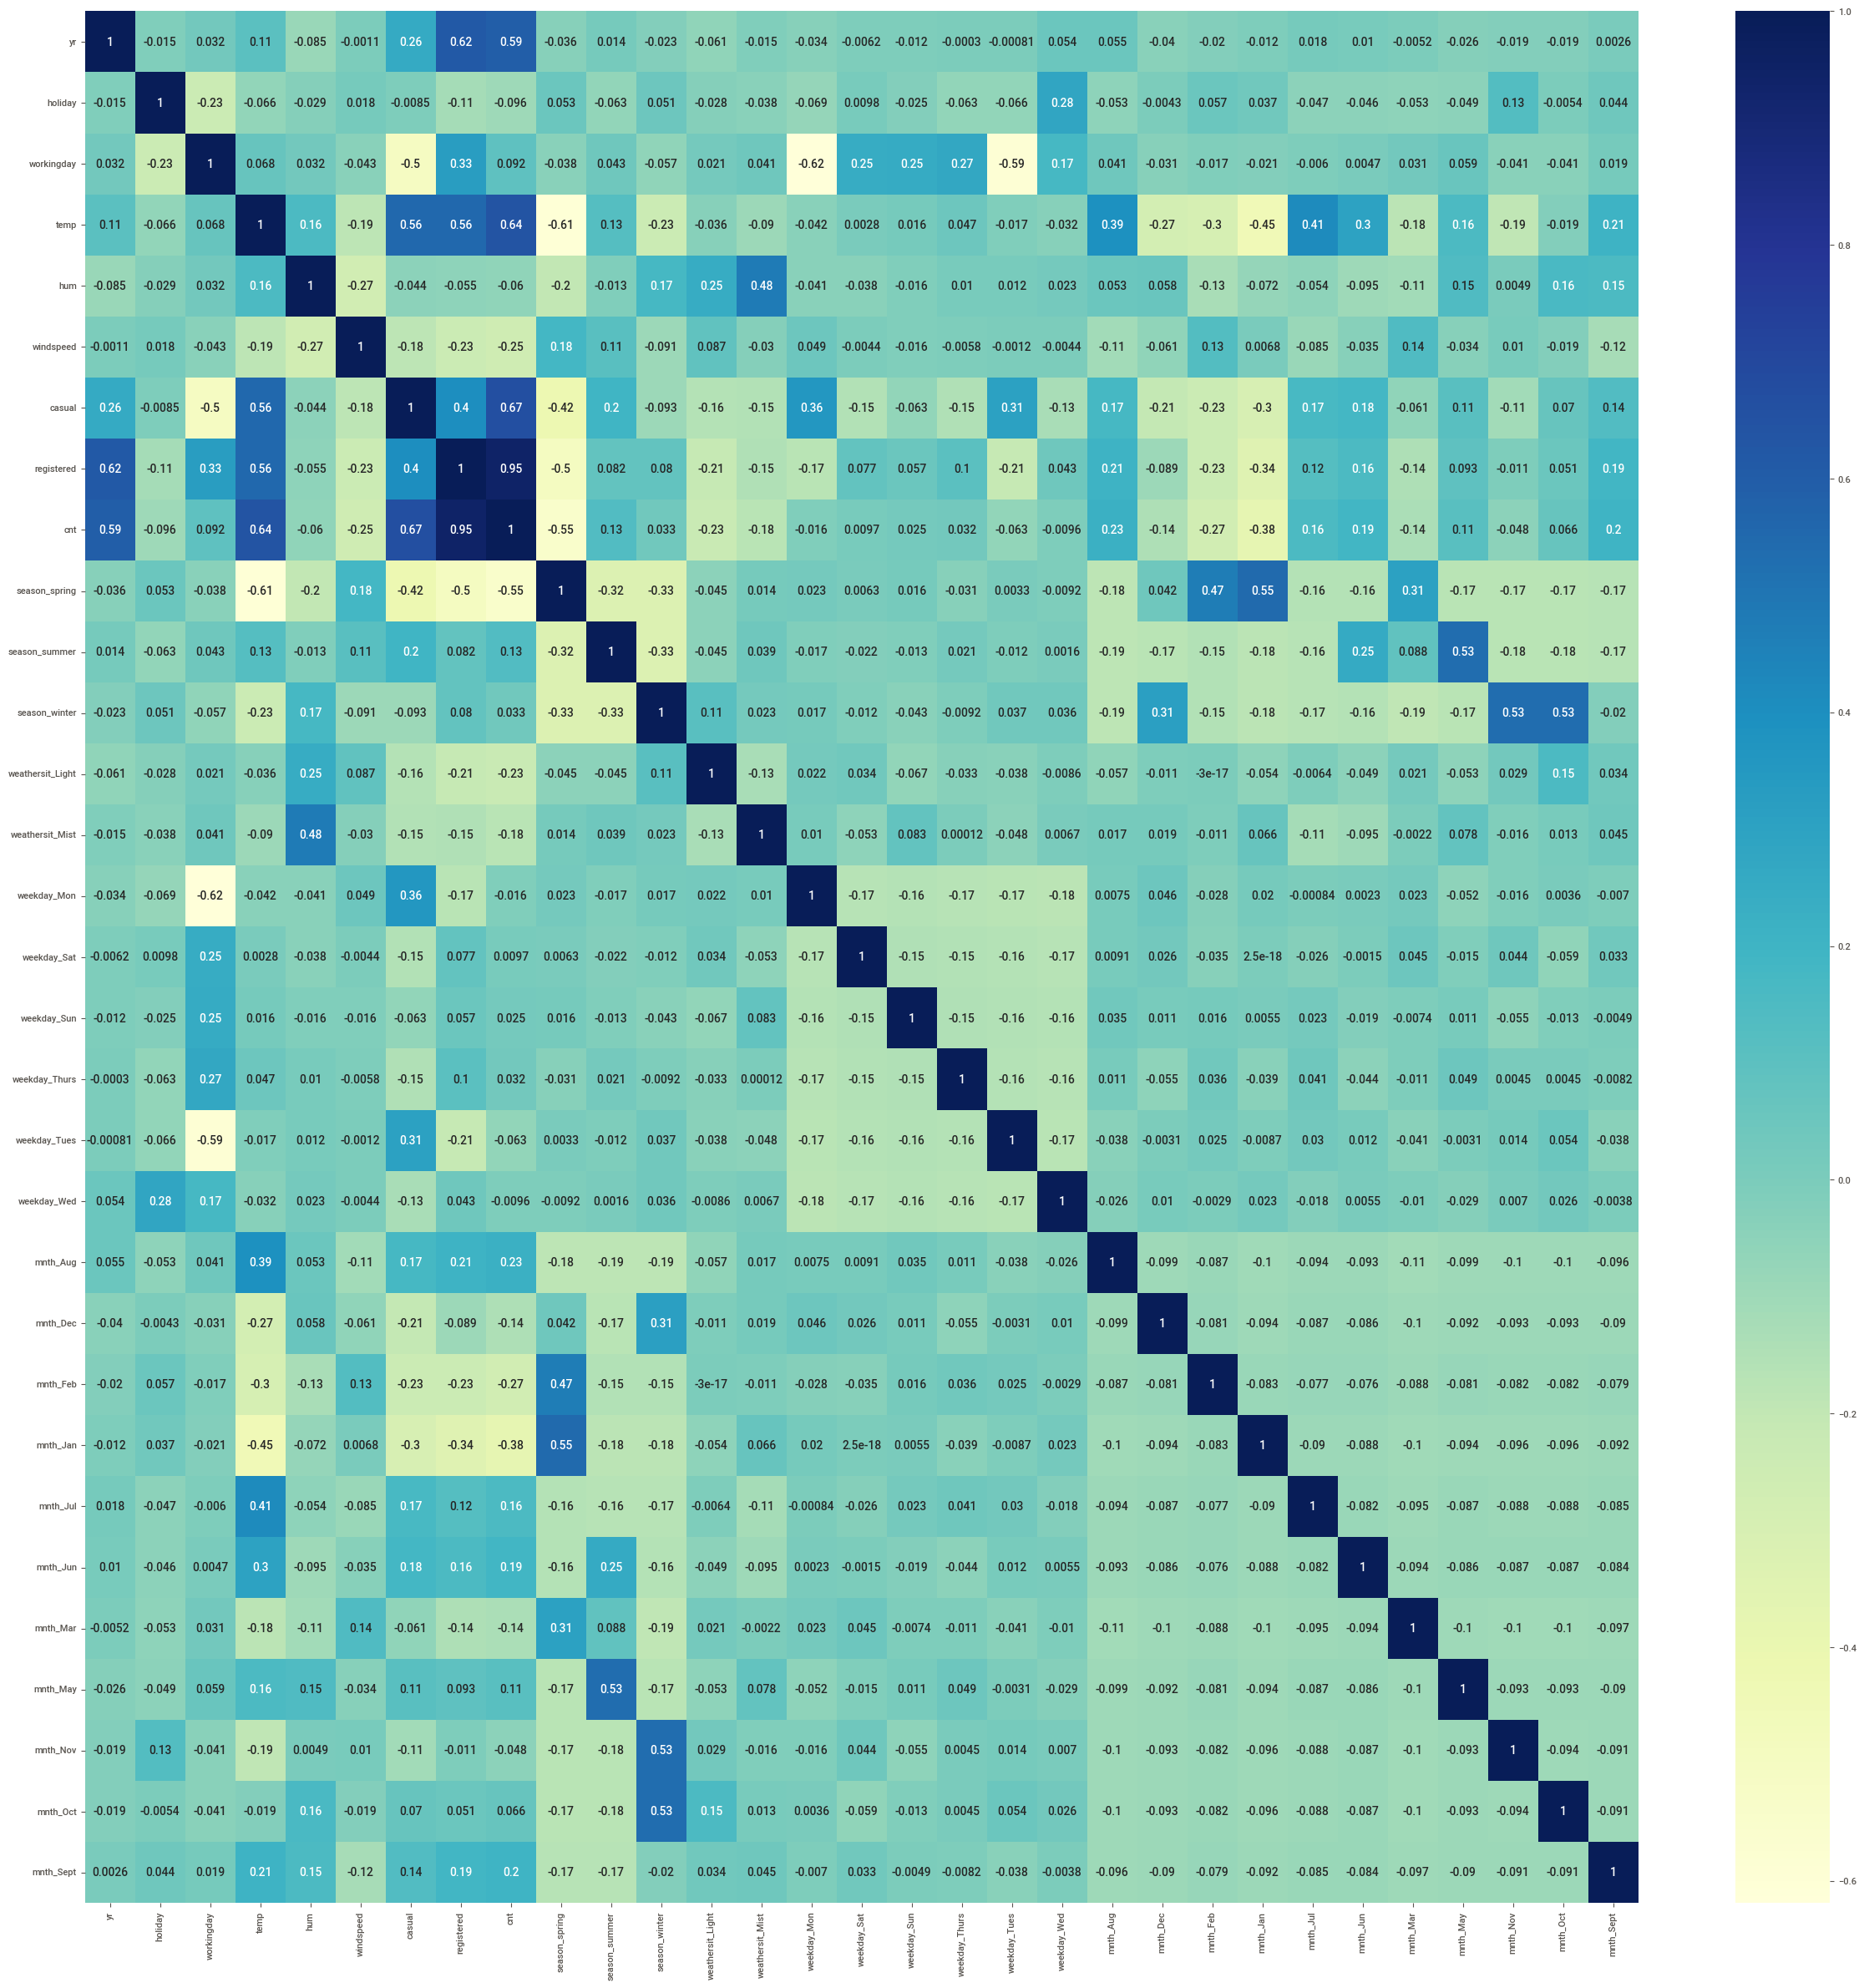

In [1416]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1417]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,1,0,0,0,0,0,0,0,0,0


In [1418]:
y_train = df_train.pop('cnt')

In [1419]:
X_train = df_train.drop(["casual","registered"],axis=1)

In [1420]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1421]:
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [1422]:
X_train.shape

(510, 28)

In [1423]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               0.242930
yr                  0.232116
holiday             0.006726
workingday          0.093651
temp                0.450562
hum                -0.151340
windspeed          -0.186453
season_spring      -0.048159
season_summer       0.038725
season_winter       0.105847
weathersit_Light   -0.257443
weathersit_Mist    -0.061066
weekday_Mon         0.098544
weekday_Sat        -0.003849
weekday_Sun         0.005388
weekday_Thurs      -0.013502
weekday_Tues        0.044008
weekday_Wed        -0.015519
mnth_Aug            0.014404
mnth_Dec           -0.045586
mnth_Feb           -0.032282
mnth_Jan           -0.062777
mnth_Jul           -0.040350
mnth_Jun           -0.002972
mnth_Mar            0.001045
mnth_May            0.023940
mnth_Nov           -0.041851
mnth_Oct            0.007534
mnth_Sept           0.081060
dtype: float64

In [1424]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [1425]:
print(lm.coef_)
print(lm.intercept_)

[ 2.32210341e-01  5.91877141e+11  5.91877141e+11  4.49968594e-01
 -1.51746346e-01 -1.86643514e-01 -4.77141304e-02  3.87039385e-02
  1.05904813e-01 -2.57021370e-01 -6.08468275e-02  5.91877141e+11
 -3.73890608e-03  5.60995636e-03 -1.33666614e-02  5.91877141e+11
 -1.55471875e-02  1.43636471e-02 -4.57212345e-02 -3.28995388e-02
 -6.33639371e-02 -4.02894659e-02 -2.60975957e-03  8.78475039e-04
  2.41745089e-02 -4.19855257e-02  7.77507866e-03  8.12577937e-02]
-591877141172.6753


In [1426]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        22:25:38   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2429      0.035      6.854      0.000       0.173       0.313
yr                   0.2321      0.008     28.820      0.000       0.216       0.248
holiday              0.0067      0.024      0.278      0.781      -0.041       0.054
workingday           0.0937      0.012      7.783      0.000       0.070       0.117
temp                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1058      0.028      3.794      0.000       0.051       0.161
weathersit_Light    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weekday_Mon          0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat         -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun          0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs       -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues         0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed         -0.0155      0.015     -1.064      0.288      -0.044       0.013
mnth_Aug             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul            -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar             0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept            0.0811      0.032      2.533      0.012       0.018       0.144
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. N

In [1427]:
# Let's try to use RFE
from sklearn.feature_selection import RFE

# Let's use 20 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=20,step=1)

rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 6),
 ('weekday_Thurs', False, 4),
 ('weekday_Tues', False, 2),
 ('weekday_Wed', False, 3),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sept', True, 1)]

In [1428]:
import statsmodels.api as sm  

columns_1 = X_train.columns[rfe1.support_]

X_train_rfe1 = X_train[columns_1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,weathersit_Mist,weekday_Mon,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sept
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,1,1,0,0,0,0,0,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [1429]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.62e-188
Time:                        22:25:45   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2904      0.041  

In [1430]:
# Dropping mnth_Feb as it is insignificant
X_train1 = X_train_rfe1.drop('mnth_Feb',1)
X_train2 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.16e-189
Time:                        22:25:46   Log-Likelihood:                 525.01
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2779      0.040      6.963      0.000       0.199       0.356
yr                   0.2312      0.008     29.014      0.000       0.216       0.247
holiday             -0.0511      0.027     -1.898      0.058      -0.104       0.002
workingday           0.0443      0.011      3.865      0.000       0.022       0.067
temp                 0.4646      0.037     12.535      0.000       0.392       0.537
hum                 -0.1548      0.038     -4.111      0.000      -0.229      -0.081
windspeed           -0.1856      0.025     -7.302      0.000      -0.236      -0.136
season_spring       -0.0561      0.026     -2.159      0.031      -0.107      -0.005
season_summer        0.0408      0.023      1.761      0.079      -0.005       0.086
season_winter        0.1118      0.023      4.947      0.000       0.067       0.156
weathersit_Light    -0.2544      0.026     -9.738      0.000      -0.306      -0.203
weathersit_Mist     -0.0599      0.010     -5.789      0.000      -0.080      -0.040
weekday_Mon          0.0550      0.014      3.811      0.000       0.027       0.083
mnth_Aug             0.0147      0.024      0.624      0.533      -0.032       0.061
mnth_Dec            -0.0408      0.017     -2.363      0.019      -0.075      -0.007
mnth_Jan            -0.0468      0.018     -2.622      0.009      -0.082      -0.012
mnth_Jul            -0.0417      0.025     -1.699      0.090      -0.090       0.007
mnth_May             0.0239      0.017      1.384      0.167      -0.010       0.058
mnth_Nov            -0.0426      0.019     -2.298      0.022      -0.079      -0.006
mnth_Sept            0.0816      0.021      3.817      0.000       0.040       0.124
==============================================================================
Omnibus:                       78.159   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.171
Skew:                          -0.738   Prob(JB):                     5.70e-49
Kurtosis:                       5.877   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1431]:
# Dropping mnth_Aug as it is insignificant
X_train1 = X_train1.drop('mnth_Aug',1)
X_train2 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.93e-190
Time:                        22:25:46   Log-Likelihood:                 524.81
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2860      0.038      7.582      0.000       0.212       0.360
yr                   0.2313      0.008     29.063      0.000       0.216       0.247
holiday             -0.0513      0.027     -1.908      0.057      -0.104       0.002
workingday           0.0444      0.011      3.880      0.000       0.022       0.067
temp                 0.4663      0.037     12.625      0.000       0.394       0.539
hum                 -0.1537      0.038     -4.089      0.000      -0.228      -0.080
windspeed           -0.1858      0.025     -7.313      0.000      -0.236      -0.136
season_spring       -0.0655      0.021     -3.099      0.002      -0.107      -0.024
season_summer        0.0308      0.017      1.837      0.067      -0.002       0.064
season_winter        0.1031      0.018      5.813      0.000       0.068       0.138
weathersit_Light    -0.2552      0.026     -9.787      0.000      -0.306      -0.204
weathersit_Mist     -0.0597      0.010     -5.774      0.000      -0.080      -0.039
weekday_Mon          0.0555      0.014      3.848      0.000       0.027       0.084
mnth_Dec            -0.0415      0.017     -2.411      0.016      -0.075      -0.008
mnth_Jan            -0.0468      0.018     -2.624      0.009      -0.082      -0.012
mnth_Jul            -0.0522      0.018     -2.910      0.004      -0.087      -0.017
mnth_May             0.0236      0.017      1.367      0.172      -0.010       0.058
mnth_Nov            -0.0435      0.018     -2.357      0.019      -0.080      -0.007
mnth_Sept            0.0732      0.017      4.411      0.000       0.041       0.106
==============================================================================
Omnibus:                       79.272   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.884
Skew:                          -0.749   Prob(JB):                     1.47e-49
Kurtosis:                       5.888   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1432]:
# Dropping mnth_May as it is insignificant
X_train1 = X_train1.drop('mnth_May',1)
X_train2 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.55e-191
Time:                        22:25:47   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2759      0.037      7.452      0.000       0.203       0.349
yr                   0.2308      0.008     29.005      0.000       0.215       0.246
holiday             -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday           0.0445      0.011      3.889      0.000       0.022       0.067
temp                 0.4750      0.036     13.038      0.000       0.403       0.547
hum                 -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed           -0.1876      0.025     -7.388      0.000      -0.237      -0.138
season_spring       -0.0611      0.021     -2.925      0.004      -0.102      -0.020
season_summer        0.0409      0.015      2.708      0.007       0.011       0.071
season_winter        0.1052      0.018      5.949      0.000       0.070       0.140
weathersit_Light    -0.2571      0.026     -9.865      0.000      -0.308      -0.206
weathersit_Mist     -0.0598      0.010     -5.781      0.000      -0.080      -0.039
weekday_Mon          0.0550      0.014      3.813      0.000       0.027       0.083
mnth_Dec            -0.0405      0.017     -2.351      0.019      -0.074      -0.007
mnth_Jan            -0.0458      0.018     -2.570      0.010      -0.081      -0.011
mnth_Jul            -0.0526      0.018     -2.932      0.004      -0.088      -0.017
mnth_Nov            -0.0420      0.018     -2.277      0.023      -0.078      -0.006
mnth_Sept            0.0732      0.017      4.404      0.000       0.041       0.106
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1433]:
# Dropping holiday as it is insignificant
X_train1 = X_train1.drop('holiday',1)
X_train2 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          4.53e-191
Time:                        22:25:49   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2694      0.037      7.286      0.000       0.197       0.342
yr                   0.2310      0.008     28.956      0.000       0.215       0.247
workingday           0.0522      0.011      4.847      0.000       0.031       0.073
temp                 0.4729      0.037     12.953      0.000       0.401       0.545
hum                 -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed           -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring       -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer        0.0406      0.015      2.683      0.008       0.011       0.070
season_winter        0.1052      0.018      5.935      0.000       0.070       0.140
weathersit_Light    -0.2568      0.026     -9.826      0.000      -0.308      -0.205
weathersit_Mist     -0.0596      0.010     -5.749      0.000      -0.080      -0.039
weekday_Mon          0.0627      0.014      4.513      0.000       0.035       0.090
mnth_Dec            -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_Jan            -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_Jul            -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_Nov            -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_Sept            0.0708      0.017      4.263      0.000       0.038       0.103
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1434]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.12
6,season_spring,5.26
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.94
15,mnth_Nov,1.73
13,mnth_Jan,1.68
2,workingday,1.66
11,weekday_Mon,1.65


In [1435]:
# Let's drop 'const' as it has very high VIF
X_train2 = X_train2.drop('const',axis=1)

In [1436]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.86
9,weathersit_Mist,2.32
0,yr,2.09
10,weekday_Mon,1.86


In [1437]:
# Let's drop 'hum' as it has very high VIF
X_train2 = X_train2.drop('hum',axis=1)

In [1438]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.02
5,season_summer,2.32
0,yr,2.08
9,weekday_Mon,1.86
13,mnth_Nov,1.78
11,mnth_Jan,1.67


In [1439]:
# Let's drop 'windspeed' and see if it still keeps fit model
X_train2 = X_train2.drop('windspeed',axis=1)

In [1440]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.24
1,workingday,4.71
5,season_winter,2.89
3,season_spring,2.40
0,yr,2.07
4,season_summer,2.05
8,weekday_Mon,1.84
12,mnth_Nov,1.76
10,mnth_Jan,1.66
11,mnth_Jul,1.59


In [1441]:
X_train2 = sm.add_constant(X_train2)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.15e-181
Time:                        22:27:09   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     495   BIC:                            -893.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1377      0.033      4.211      0.000       0.073       0.202
yr                   0.2333      0.008     27.906      0.000       0.217       0.250
workingday           0.0557      0.011      4.905      0.000       0.033       0.078
temp                 0.4581      0.037     12.414      0.000       0.386       0.531
season_spring       -0.0837      0.022     -3.823      0.000      -0.127      -0.041
season_summer        0.0254      0.016      1.609      0.108      -0.006       0.056
season_winter        0.0953      0.018      5.195      0.000       0.059       0.131
weathersit_Light    -0.3123      0.025    -12.432      0.000      -0.362      -0.263
weathersit_Mist     -0.0816      0.009     -9.147      0.000      -0.099      -0.064
weekday_Mon          0.0642      0.015      4.395      0.000       0.036       0.093
mnth_Dec            -0.0385      0.018     -2.133      0.033      -0.074      -0.003
mnth_Jan            -0.0359      0.019     -1.930      0.054      -0.072       0.001
mnth_Jul            -0.0478      0.019     -2.526      0.012      -0.085      -0.011
mnth_Nov            -0.0492      0.019     -2.542      0.011      -0.087      -0.011
mnth_Sept            0.0700      0.017      4.012      0.000       0.036       0.104
==============================================================================
Omnibus:                       87.975   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.144
Skew:                          -0.799   Prob(JB):                     2.95e-60
Kurtosis:                       6.217   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1442]:
# Let's drop 'mnth_Jul' as it has high p value now
X_train2 = X_train2.drop('mnth_Jul',axis=1)

In [1443]:
X_train2 = sm.add_constant(X_train2)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.61e-181
Time:                        22:27:24   Log-Likelihood:                 490.10
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     496   BIC:                            -892.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1299      0.033      3.969      0.000       0.066       0.194
yr                   0.2338      0.008     27.828      0.000       0.217       0.250
workingday           0.0566      0.011      4.965      0.000       0.034       0.079
temp                 0.4448      0.037     12.113      0.000       0.373       0.517
season_spring       -0.0726      0.022     -3.366      0.001      -0.115      -0.030
season_summer        0.0395      0.015      2.657      0.008       0.010       0.069
season_winter        0.1068      0.018      5.974      0.000       0.072       0.142
weathersit_Light    -0.3134      0.025    -12.409      0.000      -0.363      -0.264
weathersit_Mist     -0.0803      0.009     -8.968      0.000      -0.098      -0.063
weekday_Mon          0.0646      0.015      4.395      0.000       0.036       0.093
mnth_Dec            -0.0390      0.018     -2.151      0.032      -0.075      -0.003
mnth_Jan            -0.0379      0.019     -2.030      0.043      -0.075      -0.001
mnth_Nov            -0.0490      0.019     -2.514      0.012      -0.087      -0.011
mnth_Sept            0.0830      0.017      4.952      0.000       0.050       0.116
==============================================================================
Omnibus:                       89.290   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.093
Skew:                          -0.825   Prob(JB):                     1.00e-58
Kurtosis:                       6.138   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1444]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.01
4,season_spring,4.95
3,temp,3.97
6,season_winter,3.46
5,season_summer,2.37
12,mnth_Nov,1.73
2,workingday,1.65
9,weekday_Mon,1.64
11,mnth_Jan,1.63
10,mnth_Dec,1.47


In [1445]:
# Let's drop 'const' now
X_train2 = X_train2.drop('const',axis=1)
lm1 = sm.OLS(y_train, X_train2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1321.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:27:33   Log-Likelihood:                          482.13
No. Observations:                 510   AIC:                                     -938.3
Df Residuals:                     497   BIC:                                     -883.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
yr                   0.2352      0.009     27.615      0.000       0.218       0.252
workingday           0.0690      0.011      6.204      0.000       0.047       0.091
temp                 0.5766      0.016     36.134      0.000       0.545       0.608
season_spring       -0.0036      0.013     -0.275      0.784      -0.029       0.022
season_summer        0.0789      0.011      7.018      0.000       0.057       0.101
season_winter        0.1522      0.014     10.917      0.000       0.125       0.180
weathersit_Light    -0.3051      0.026    -11.946      0.000      -0.355      -0.255
weathersit_Mist     -0.0761      0.009     -8.434      0.000      -0.094      -0.058
weekday_Mon          0.0778      0.015      5.353      0.000       0.049       0.106
mnth_Dec            -0.0186      0.018     -1.055      0.292      -0.053       0.016
mnth_Jan            -0.0180      0.018     -0.987      0.324      -0.054       0.018
mnth_Nov            -0.0282      0.019     -1.481      0.139      -0.066       0.009
mnth_Sept            0.0977      0.017      5.892      0.000       0.065       0.130
==============================================================================
Omnibus:                       81.420   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.251
Skew:                          -0.807   Prob(JB):                     1.63e-45
Kurtosis:                       5.665   Cond. No.                         7.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1446]:
# Let's see variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.86
1,workingday,4.71
5,season_winter,2.72
3,season_spring,2.29
0,yr,2.07
8,weekday_Mon,1.84
11,mnth_Nov,1.76
4,season_summer,1.74
10,mnth_Jan,1.66
7,weathersit_Mist,1.57


Text(0.5, 0, 'Errors')

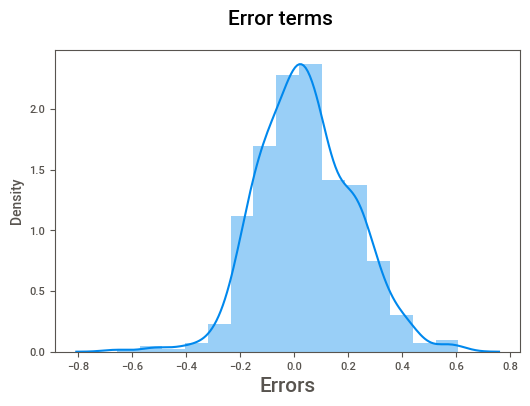

In [1373]:
# Now we have variables less than 5
# Lets do residual analysis on train data

fig = plt.figure()
y_train_pred = lm1.predict(X_train2)
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 15)

In [1447]:
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [1448]:
# Let's make predictions now
df_test[var] = scaler.transform(df_test[var])

In [1449]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1450]:
X_test1 = X_test[X_train2.columns]

In [1451]:
y_test_pred = lm1.predict(X_test1)

Text(0, 0.5, 'Predictions')

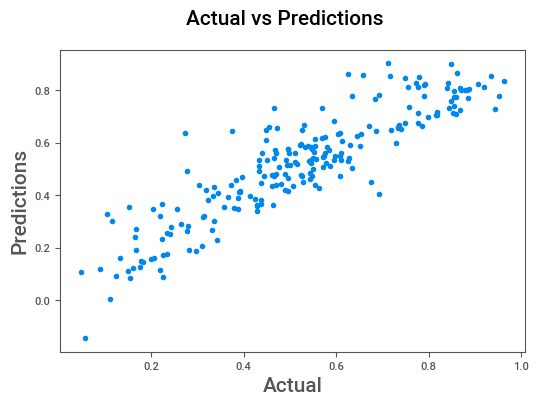

In [1452]:
# Let's evaluate the model now
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=15)
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

In [1453]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8030389722439311